Taken from Nick Becker's blog. Here's the link

https://beckernick.github.io/logistic-regression-from-scratch/

In [ ]:
# generating data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

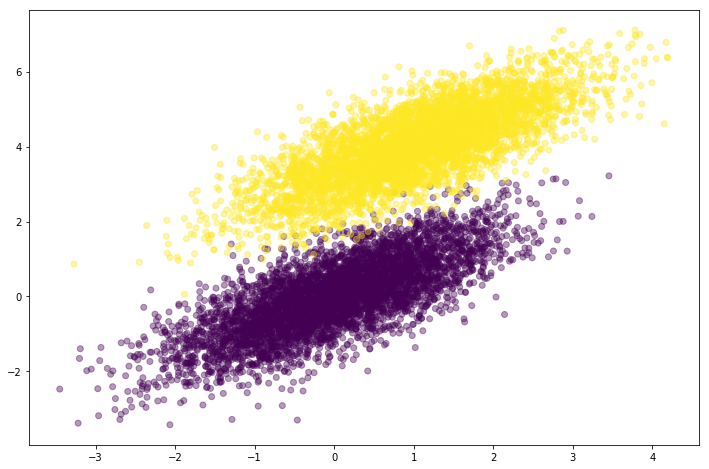

In [2]:
# plotting the data

plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

In [4]:
# defining a link function. To know about link funtions, read the Wikipedia page for GLM

def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

likelihood is the product of all propabilites of y == 1 | x,w
log likelihood is the sum of those logs
ll = sigmaOverAllExamples[(yi * BetaTranspose * xi) - log(1 + exp( betaTranspose * xi))]

gradient is the derivative of this ll function over the weights vector Beta

In [5]:
# calculating the log likelihood

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [9]:
# calculating the gradient, we dont need a function for this

# delta ll = X Transpose * (Y - Predictions)

# we are also adding an option to include intercepts

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(step, log_likelihood(features, target, weights))
        
    return weights

In [18]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 200000, learning_rate = 5e-5, add_intercept=True)

weights
# we can make the learning rate dynamic as well, which will change with time. Starting with a larger value,
# moving to a smaller value

0 -4346.26477915
10000 -148.706722768
20000 -142.964936231
30000 -141.545303072
40000 -141.060319659
50000 -140.870315859
60000 -140.790259128
70000 -140.755050023
80000 -140.739145032
90000 -140.731834989
100000 -140.728436667
110000 -140.726844713
120000 -140.72609509
130000 -140.725740861
140000 -140.725573069
150000 -140.725493458
160000 -140.725455643
170000 -140.725437666
180000 -140.725429116
190000 -140.725425048


array([-14.09049533,  -5.05837692,   8.28854244])

In [21]:
# let's check scores on data with the learned parametsd

# first need to get new data with intercepts

data_with_intercept = np.hstack((np.ones(shape = (simulated_separableish_features.shape[0], 1)),
                               simulated_separableish_features))

final_scores = np.dot(data_with_intercept, weights)

preds = np.round(sigmoid(final_scores))

accuracy = (preds == simulated_labels).sum().astype(float) / len(preds)

accuracy

0.99480000000000002

In [17]:
# comparing with sklearn

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept = True, C = 1e-5)
clf.fit(simulated_separableish_features, simulated_labels)

print(clf.intercept_, clf.coef_)

LogisticRegression?

[-0.00415] [[ 0.01851287  0.08092003]]


1.0